<a href="https://colab.research.google.com/github/Bhuvanjeet/Credit-Card-Fraud-Detection/blob/master/card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Fraud Detection**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

To Identify: - Fraudulent credit card transactions.

Source:- https://www.kaggle.com/mlg-ulb/creditcardfraud

**Project Overview :**

**1- Exploratory Data Analysis - EDA**

**2- Data Visualization**

**3- Outliers Detection**

**4- Data Pre-processing and Decomposition**


Logistic Regression on original data

Resampling


**5- Undersampling - TomekLinks**


Logistic Regression on undersampled data


**6- Oversampling - SMOTE (Synthetic Minority Over-sampling Technique)**


Logisitc Regression on oversampled data


Using different Machine Learning Algorithms on Undersampled data:


**7- K Nearest Neighbors (KNN) Classifier**


**8- Random Forest Classifier**


**9- Naive Bayes Classifier**


**10- Support Vector Machine (SVM)**


**11- Results and Comparison**



**Exploratory Data Analysis - EDA**

In [0]:
import pandas as pd
import pandas.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1YyM8W6_oS_gJ0-m35LERdg_lZg_HWK1F'

In [12]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1YyM8W6_oS_gJ0-m35LERdg_lZg_HWK1F


In [0]:
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('creditcard.csv')

In [0]:
df=pd.read_csv('creditcard.csv')

In [15]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
df['Class'].unique()

array([0, 1])

In [19]:
sum(df.duplicated())

1081

In [0]:
df.drop_duplicates(inplace=True)

In [21]:
sum(df.duplicated())

0

In [22]:
df.shape

(283726, 31)

In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


**Data Visualization**

In [24]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

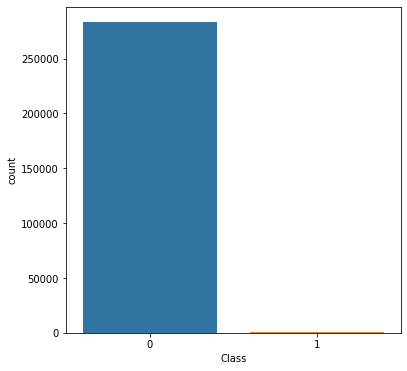

In [25]:
plt.figure(figsize=(6,6)) 
sns.countplot(x='Class',data=df)

In [26]:
normal_tranc = len(df[df["Class"]==0])
fraud_tranc = len(df[df["Class"]==1])
normal_tranc_percent= normal_tranc/(normal_tranc+fraud_tranc)
print("Percentage of Normal Transacations: ",normal_tranc_percent*100)
fraud_tranc_percent = fraud_tranc/(normal_tranc+fraud_tranc)
print("Percentage of Fraud Transacations: ",fraud_tranc_percent*100)

Percentage of Normal Transacations:  99.83328986416473
Percentage of Fraud Transacations:  0.1667101358352777


We see that the data is highly imbalanced since the number of fraud transactions is very less as compared to correct transactions. So we have to avoid this problem or it may affect our accuracy.

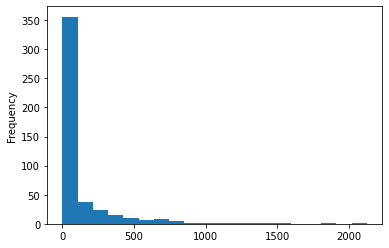

In [27]:
# fraud transaction w.r.t Amount
df[df["Class"]==1]['Amount'].plot.hist(bins=20)

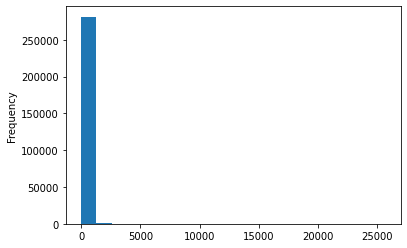

In [28]:
# normal transaction w.r.t Amount
df[df["Class"]==0]['Amount'].plot.hist(bins=20)

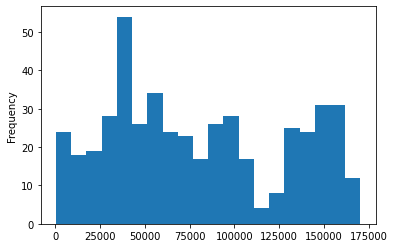

In [29]:
# fraud transaction w.r.t Time
df[df["Class"]==1]['Time'].plot.hist(bins=20)

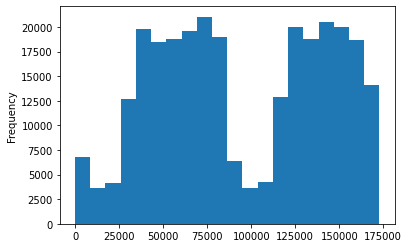

In [30]:
# normal transaction w.r.t Time
df[df["Class"]==0]['Time'].plot.hist(bins=20)

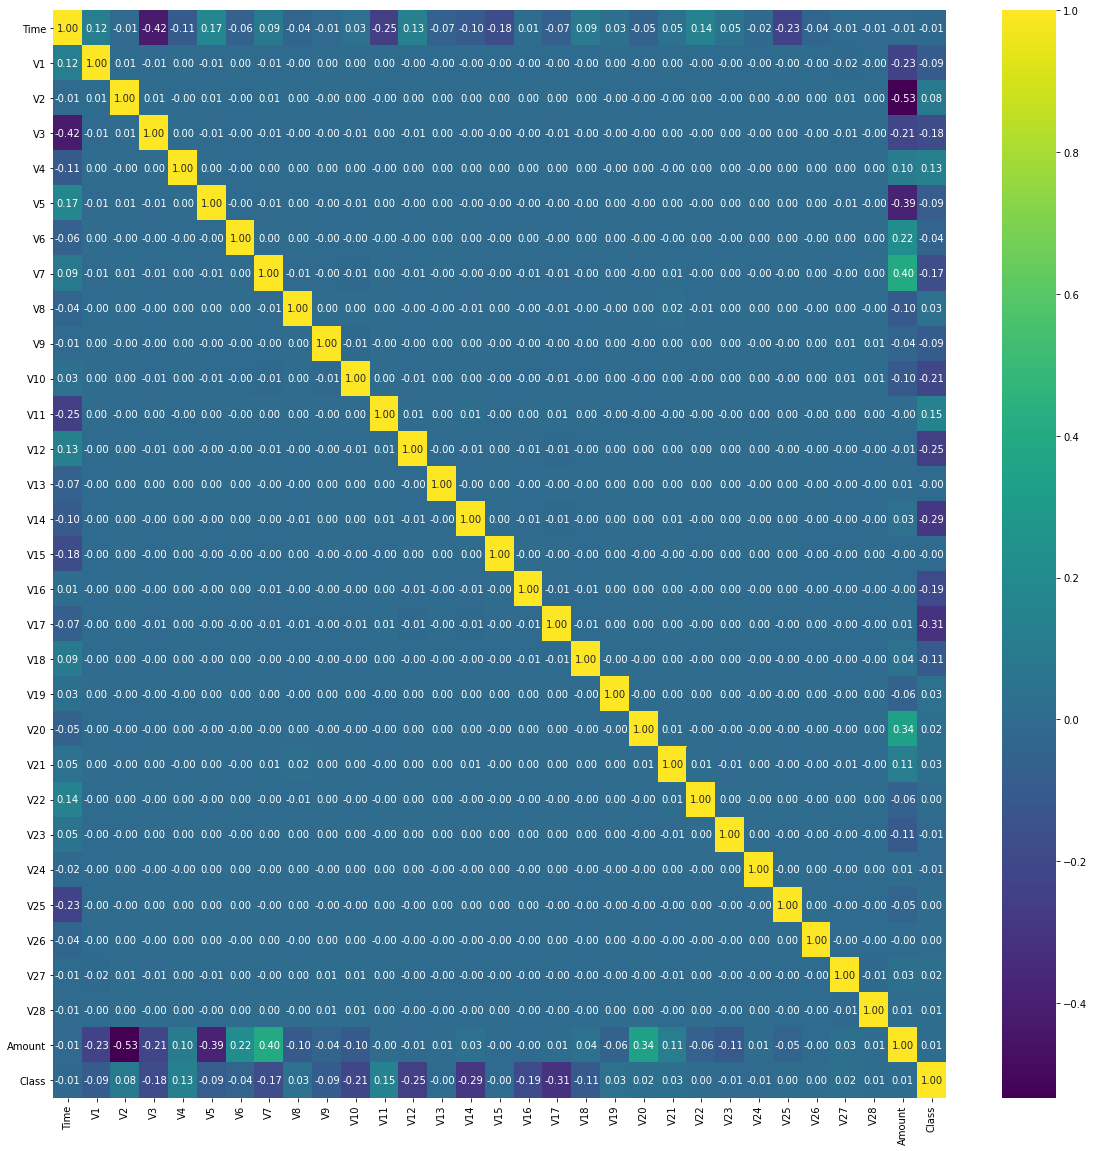

In [31]:
# maps correlation as color encoded matrices.
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='viridis',fmt='.2f')

In [32]:
# correlation of 'Class' with other features
df.corr()['Class'].sort_values(ascending=False)
# or 'df.corrwith(df['Class']).sort_values(ascending=False)'

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64

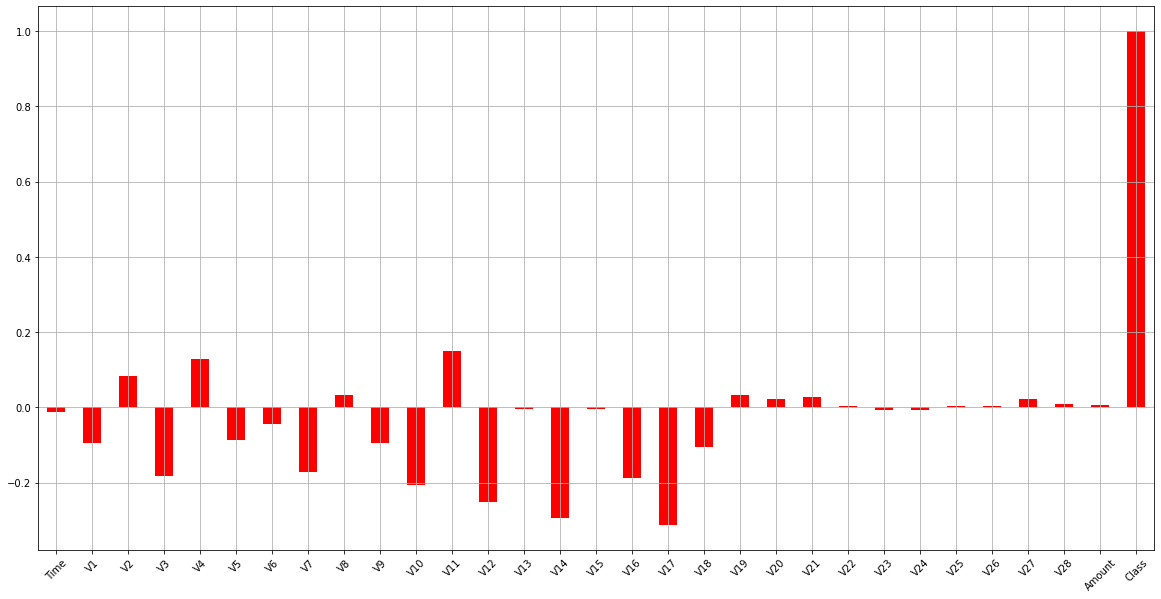

In [33]:
plt.figure(figsize=(20,10))
df.corrwith(df['Class']).plot.bar(color='r',grid=True,rot=45)

We see that most of the features are correlated with 'Class', so we will not 
drop any feature.

**Outliers Detection**

In [0]:
# this function visualizes the df using boxplot
# from boxplot we can easily determine wheteher outliers are ther or not
def box_plot(data,features):
    melted=[]
    plt.figure()
    fig,ax=plt.subplots(5,6,figsize=(30,20))
    i=0
    for j in features:
        melted.insert(i,pd.melt(df,id_vars = "Class",value_vars = [j]))   #pd.melt converts a wide form data to long form
        i+=1
    melted_arr=np.arange(1,len(melted))    
    for k in melted_arr:
        plt.subplot(5,6,k)
        sns.boxplot(x = "variable", y = "value", hue="Class",data= melted[k-1])
    plt.show()

<Figure size 432x288 with 0 Axes>

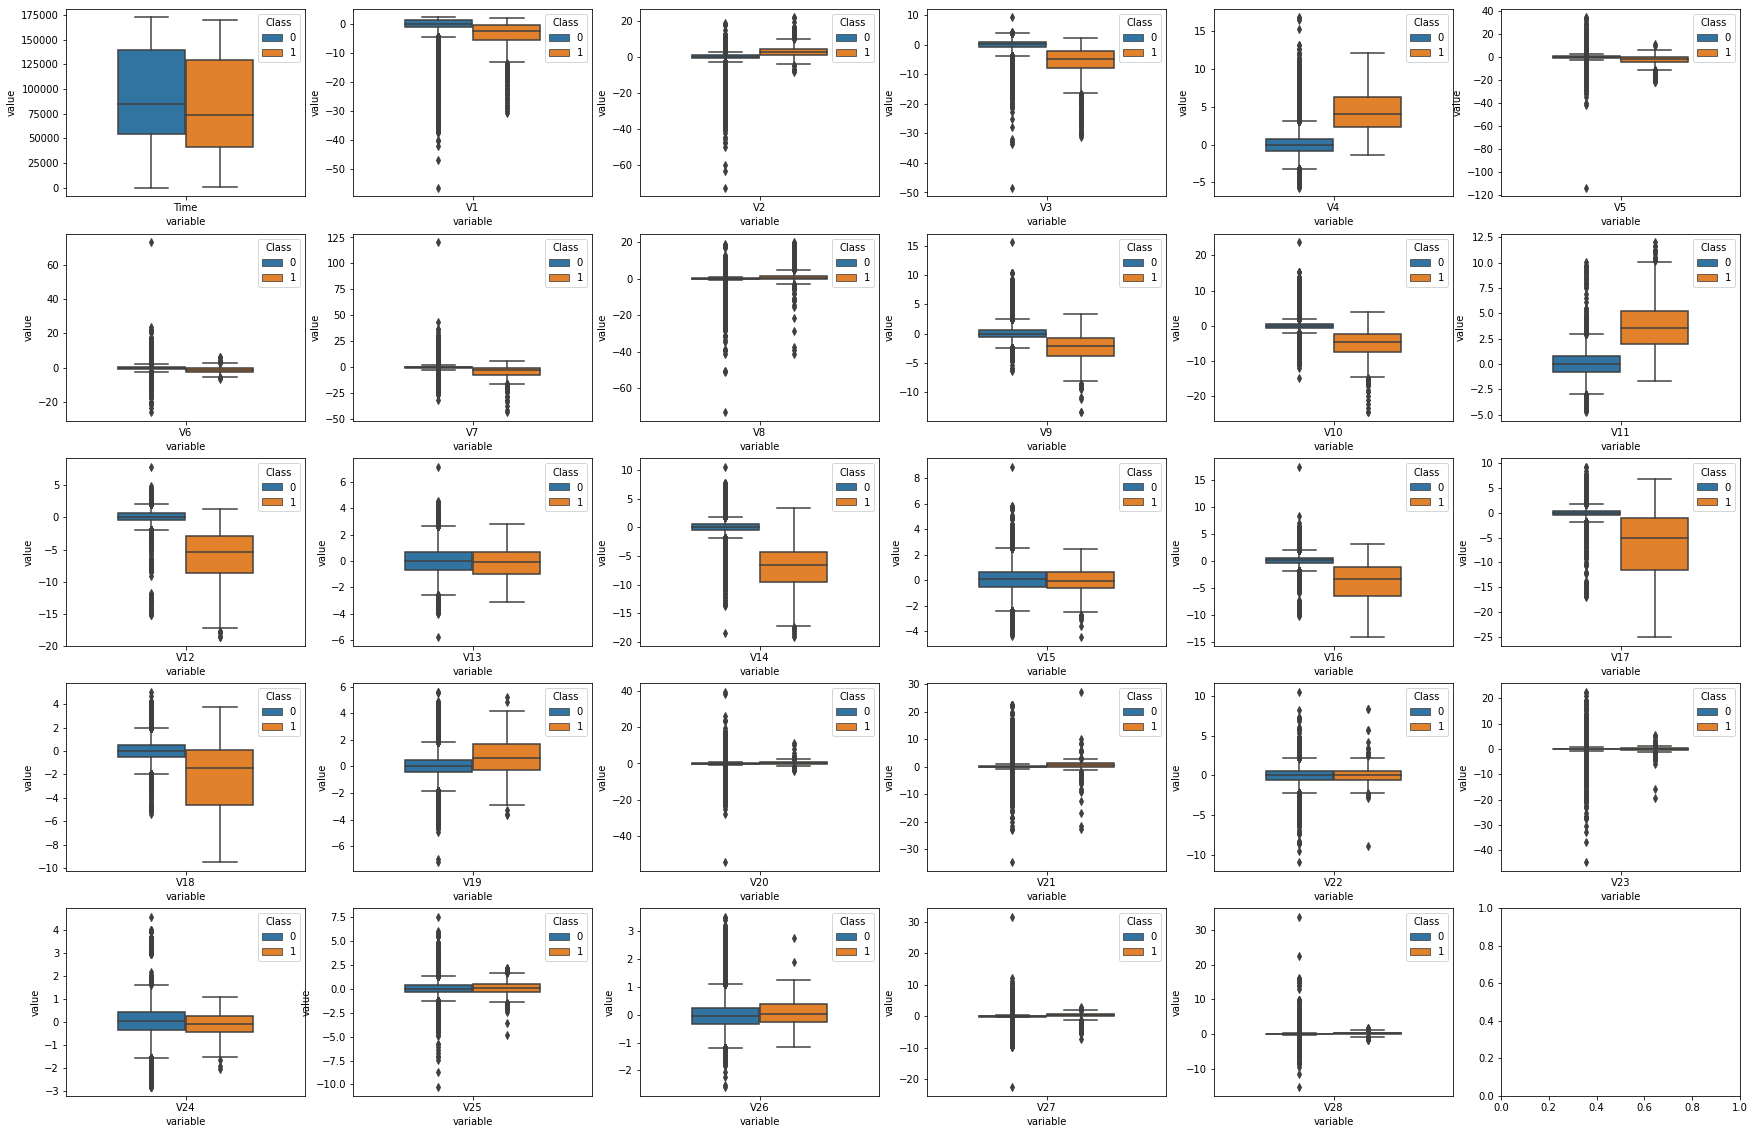

In [35]:
box_plot(df,df.columns.values[:-1])

We see that there are a lot of outliers in the dataset and that we have to remove them or they will affect our result. We will remove them when we will do train and test split.

Also, till here we have seen that there is no pattern in data as such.

**Data Pre-processing and Decomposition**

In [0]:
X=df.drop('Class',axis=1)
y=df['Class']

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [0]:
#since the dataset has many dimensions (features)
#we will reduce the size of the dataset using Principal Component Analysis (PCA):
#although the dataset given is PCA transformed , the 'Time' and 'Amount' column was not PCA transformed. 
#So this will transform them as well.  
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [156]:
#Logistic Regression on original data
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(random_state = 0, penalty = 'l2')  #Ridge('l2') regression
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred=lm.predict(X_test)

In [158]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n',confusion_matrix(y_test,pred))
print('\nClassification Report:\n',classification_report(y_test,pred,digits=6))

Confusion Matrix:
 [[84980     0]
 [  138     0]]

Classification Report:
               precision    recall  f1-score   support

           0   0.998379  1.000000  0.999189     84980
           1   0.000000  0.000000  0.000000       138

    accuracy                       0.998379     85118
   macro avg   0.499189  0.500000  0.499594     85118
weighted avg   0.996760  0.998379  0.997569     85118



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now , to handle imbalanced data, we will do : 

**Resampling** 

1- Resample our data with different size.

2- Use this resampled data to train ML model

3- Use this model to predict for original data

We will do: -

1- Undersampling - removing samples from the majority class - TomekLinks

2- Oversampling - adding more examples from the minority class - SMOTE - Synthetic Minority Over-sampling Technique

In [0]:
import imblearn

**1- UnderSampling**

In [0]:
# we could use RandomUnderSampler,ClusterCentroids,ENN etc.
# But instances participating in Tomek links are either borderline or noise i.e. outliers 
# so both are removed and since we have outliers in our dataset, we prefer to use this method for undersampling
from imblearn.under_sampling import TomekLinks

In [0]:
tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

In [161]:
# no. of removed indices
len(id_tl)

283431

In [0]:
# train-test split
from sklearn.model_selection import train_test_split
X_traintl, X_testtl, y_traintl, y_testtl = train_test_split(X_tl, y_tl, test_size=0.30, random_state=101)

In [163]:
#Logistic Regression on Undersampled data
from sklearn.linear_model import LogisticRegression
lmunder = LogisticRegression(random_state = 0, penalty = 'l2')  #Ridge('l2') regression
lmunder.fit(X_traintl, y_traintl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred_lmunder=lmunder.predict(X_testtl)

In [165]:
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve
print('Confusion Matrix:\n',confusion_matrix(y_testtl,pred_lmunder))
print('\nClassification Report:\n',classification_report(y_testtl,pred_lmunder,digits=6))

Confusion Matrix:
 [[84877     0]
 [  153     0]]

Classification Report:
               precision    recall  f1-score   support

           0   0.998201  1.000000  0.999100     84877
           1   0.000000  0.000000  0.000000       153

    accuracy                       0.998201     85030
   macro avg   0.499100  0.500000  0.499550     85030
weighted avg   0.996405  0.998201  0.997302     85030



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**2- OverSampling**

In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

In [0]:
# train-test split
from sklearn.model_selection import train_test_split
X_trainsm, X_testsm, y_trainsm, y_testsm = train_test_split(X_sm, y_sm, test_size=0.30, random_state=101)

In [169]:
#Logistic Regression on Undersampled data
from sklearn.linear_model import LogisticRegression
lmover = LogisticRegression(random_state = 0, penalty = 'l2')  #Ridge('l2') regression
lmover.fit(X_trainsm, y_trainsm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred_lmover=lmover.predict(X_testsm)

In [171]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n',confusion_matrix(y_testsm,pred_lmover))
print('\nClassification Report:\n',classification_report(y_testsm,pred_lmover,digits=6))

Confusion Matrix:
 [[43057 42269]
 [31843 52783]]

Classification Report:
               precision    recall  f1-score   support

           0   0.574860  0.504618  0.537453     85326
           1   0.555307  0.623721  0.587529     84626

    accuracy                       0.563924    169952
   macro avg   0.565083  0.564169  0.562491    169952
weighted avg   0.565123  0.563924  0.562388    169952



We see that the accuracy from undersampling is more than oversampling. So we will prefer undersampling than oversampling 

**Using different Machine Learning Algorithms on Undersampled data:**

**K Nearest Neighbours (KNN) Classsifier**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# sqrt(no. of features in training set) is approx. 5
knn=KNeighborsClassifier(n_neighbors=5)

In [174]:
knn.fit(X_traintl,y_traintl)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
pred_knn=knn.predict(X_testtl)

In [176]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n',confusion_matrix(y_testtl,pred_knn))
print('\nClassification Report:\n',classification_report(y_testtl,pred_knn,digits=6))

Confusion Matrix:
 [[84875     2]
 [  153     0]]

Classification Report:
               precision    recall  f1-score   support

           0   0.998201  0.999976  0.999088     84877
           1   0.000000  0.000000  0.000000       153

    accuracy                       0.998177     85030
   macro avg   0.499100  0.499988  0.499544     85030
weighted avg   0.996404  0.998177  0.997290     85030



**Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
rfc = RandomForestClassifier(random_state = 0, n_estimators = 100,criterion = 'entropy')
rfc.fit(X_traintl, y_traintl)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
pred_rfc=rfc.predict(X_testtl)

In [180]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n',confusion_matrix(y_testtl,pred_rfc))
print('\nClassification Report:\n',classification_report(y_testtl,pred_rfc,digits=6))

Confusion Matrix:
 [[84873     4]
 [  149     4]]

Classification Report:
               precision    recall  f1-score   support

           0   0.998248  0.999953  0.999099     84877
           1   0.500000  0.026144  0.049689       153

    accuracy                       0.998201     85030
   macro avg   0.749124  0.513048  0.524394     85030
weighted avg   0.997351  0.998201  0.997391     85030



**Naive Bayes Classifier**

In [181]:
from sklearn.naive_bayes import GaussianNB   
#Naive Bayes classifier assumes that the presence of a particular feature 
#in a class is unrelated to the presence of any other feature.
nb=GaussianNB()   # using GaussianNB instead of MultinomialNB since there are negative values also in the dataset
nb.fit(X_traintl,y_traintl)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
pred_nb=nb.predict(X_testtl)

In [183]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n',confusion_matrix(y_testtl,pred_nb))
print('\nClassification Report:\n',classification_report(y_testtl,pred_nb,digits=6))

Confusion Matrix:
 [[84877     0]
 [  153     0]]

Classification Report:
               precision    recall  f1-score   support

           0   0.998201  1.000000  0.999100     84877
           1   0.000000  0.000000  0.000000       153

    accuracy                       0.998201     85030
   macro avg   0.499100  0.500000  0.499550     85030
weighted avg   0.996405  0.998201  0.997302     85030



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Support Vector Machine**

In [184]:
from sklearn.svm import SVC
svc = SVC(random_state = 0, kernel = 'rbf')
svc.fit(X_traintl, y_traintl)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
pred_svc=svc.predict(X_testtl)

In [186]:
from sklearn.metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n',confusion_matrix(y_testtl,pred_svc))
print('\nClassification Report:\n',classification_report(y_testtl,pred_svc,digits=6))

Confusion Matrix:
 [[84877     0]
 [  153     0]]

Classification Report:
               precision    recall  f1-score   support

           0   0.998201  1.000000  0.999100     84877
           1   0.000000  0.000000  0.000000       153

    accuracy                       0.998201     85030
   macro avg   0.499100  0.500000  0.499550     85030
weighted avg   0.996405  0.998201  0.997302     85030



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Results and Comparison :**

We saw that undersampled data gave better results than oversampled data.

So we chose to use undersampled data and applied different ML algorithms on that data.

In [196]:
from sklearn.metrics import confusion_matrix,classification_report,plot_precision_recall_curve
print('1-Logistic Regression:\n')
print('Confusion Matrix:\n',confusion_matrix(y_testtl,pred_lmunder))
print('\nClassification Report:\n',classification_report(y_testtl,pred_lmunder,digits=6))

print('\n2-K Nearest Neighbours:\n')
print('Confusion Matrix:\n',confusion_matrix(y_testtl,pred_knn))
print('\nClassification Report:\n',classification_report(y_testtl,pred_knn,digits=6))

print('\n3-Random Forest Classifier:\n')
print('Confusion Matrix:\n',confusion_matrix(y_testtl,pred_rfc))
print('\nClassification Report:\n',classification_report(y_testtl,pred_rfc,digits=6))

print('\n4-Naive Bayes Classifier:\n')
print('Confusion Matrix:\n',confusion_matrix(y_testtl,pred_nb))
print('\nClassification Report:\n',classification_report(y_testtl,pred_nb,digits=6))

print('\n5-Support Vector Machine:\n')
print('Confusion Matrix:\n',confusion_matrix(y_testtl,pred_svc))
print('\nClassification Report:\n',classification_report(y_testtl,pred_svc,digits=6))

1-Logistic Regression:

Confusion Matrix:
 [[84877     0]
 [  153     0]]

Classification Report:
               precision    recall  f1-score   support

           0   0.998201  1.000000  0.999100     84877
           1   0.000000  0.000000  0.000000       153

    accuracy                       0.998201     85030
   macro avg   0.499100  0.500000  0.499550     85030
weighted avg   0.996405  0.998201  0.997302     85030


2-K Nearest Neighbours:



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix:
 [[84875     2]
 [  153     0]]

Classification Report:
               precision    recall  f1-score   support

           0   0.998201  0.999976  0.999088     84877
           1   0.000000  0.000000  0.000000       153

    accuracy                       0.998177     85030
   macro avg   0.499100  0.499988  0.499544     85030
weighted avg   0.996404  0.998177  0.997290     85030


3-Random Forest Classifier:

Confusion Matrix:
 [[84873     4]
 [  149     4]]

Classification Report:
               precision    recall  f1-score   support

           0   0.998248  0.999953  0.999099     84877
           1   0.500000  0.026144  0.049689       153

    accuracy                       0.998201     85030
   macro avg   0.749124  0.513048  0.524394     85030
weighted avg   0.997351  0.998201  0.997391     85030


4-Naive Bayes Classifier:

Confusion Matrix:
 [[84877     0]
 [  153     0]]

Classification Report:
               precision    recall  f1-score   support

        